In [13]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.io.wavfile import read
import scipy.io

# script importing
from peak_picking import *
from pca import *

# data loading
mat = scipy.io.loadmat(
    '/Users/vojta/Desktop/Josie/ČVUT/Bakalářská práce - OAE/data/SFOAE/sfoae20dBg130TM45R19rs2.mat')

fvect = mat['Fvect'].flatten()  # frequency axis
SFOAE = mat['oaeNum20'].flatten()  # celkove SFOAE
CRcomp = mat['CRc20'].flatten()  # CR component
NLcomp = mat['Yunl20'].flatten()  # NL component

freq_range = np.size(fvect) # maximum index on the frequency axis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


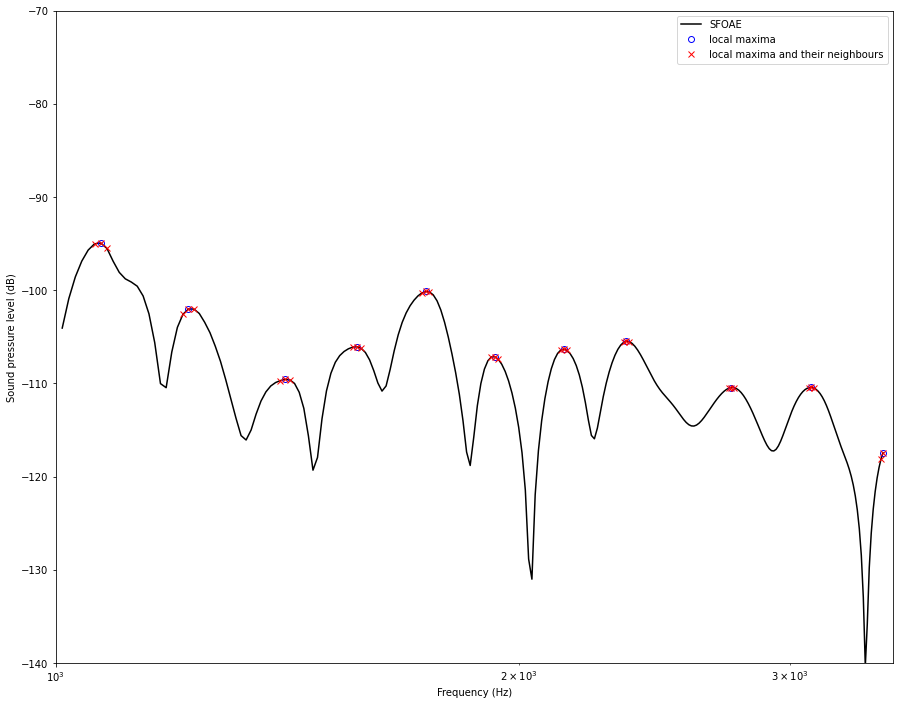

In [14]:
maximas = findLocalMaxima(np.real(20*np.log10(SFOAE)))
shift = 1  # 3 points around all peaks (the peak is included)
extended_maximas = peakNeighbours(maximas, shift, freq_range)


# sound wave in decibels
fig, ax = plt.subplots(figsize=(15, 12))
ax.plot(fvect, 20*np.log10(SFOAE), 'k', label='SFOAE')
#ax.plot(fvect, 20*np.log10(CRcomp), 'r', label='CRcomp')
#ax.plot(fvect, 20*np.log10(NLcomp), 'g', label='NLcomp')
ax.plot(fvect[maximas], 20 *
        np.log10(SFOAE[maximas]), "bo",label='local maxima', mfc='none')
ax.plot(fvect[extended_maximas], 20 *
        np.log10(SFOAE[extended_maximas]), "rx", label='local maxima and their neighbours')

ax.set_xscale('log')
ax.set_xlim([1000, 3.5e3])
ax.set_ylim([-140, -70])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Sound pressure level (dB)')
ax.legend()
plt.show()


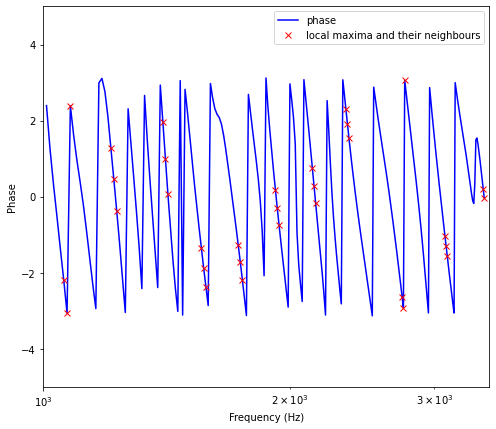

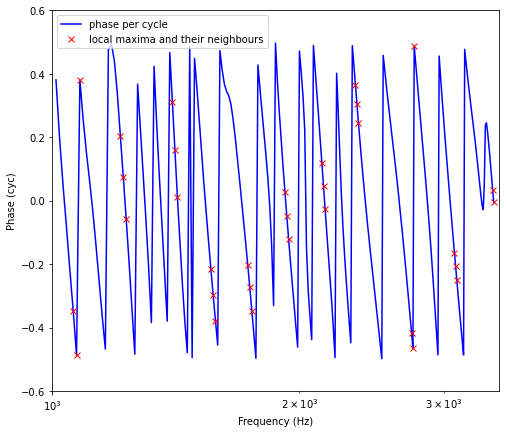

In [15]:
phase = np.angle(SFOAE)

# phase
fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(fvect, phase, 'b', label='phase')
ax.plot(fvect[extended_maximas], phase[extended_maximas],
        "rx", label='local maxima and their neighbours')        

ax.set_xscale('log')
ax.set_xlim([1000, 3.5e3])
ax.set_ylim([-5, 5])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase')
ax.legend()
plt.show()

# phase per cycle (2 pi)
phase_cycle = phase/(2*np.pi)
fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(fvect, phase_cycle, 'b', label='phase per cycle')
ax.plot(fvect[extended_maximas], phase_cycle[extended_maximas], "rx",
        label='local maxima and their neighbours')

ax.set_xscale('log')
ax.set_xlim([1000, 3.5e3])
ax.set_ylim([-0.6, 0.6])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (cyc)')
ax.legend()
plt.show()


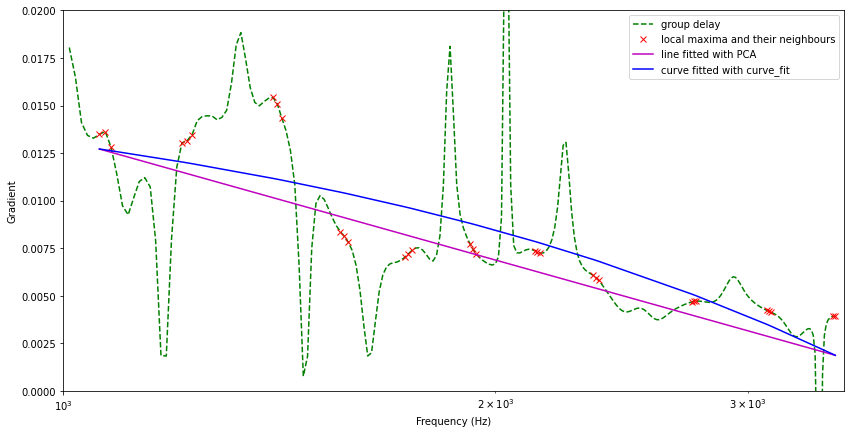

In [18]:
step_size = fvect[1] - fvect[0] # difference between neighbour samples on the frequency axis (evenly spaced)
phase_gradient = np.gradient(np.unwrap(phase), step_size)
#phase_gradient = gradient_calculation(phase_cycle)

fig, ax = plt.subplots(figsize=(14, 7))
#ax.plot(fvect, phase_gradient, '0.8', linestyle='-.', label='phase gradient')
#ax.plot(fvect[extended_maximas], phase_gradient[extended_maximas], "rx", label='local maxima and their neighbours')

group_delay = -phase_gradient/(2*np.pi)
ax.plot(fvect, group_delay, 'g', linestyle='--', label='group delay')
ax.plot(fvect[extended_maximas], group_delay[extended_maximas], "rx", label='local maxima and their neighbours')

# line approximation and fitting in 2-D
k = 1 # 2-D line
A = np.vstack((fvect[extended_maximas], group_delay[extended_maximas]))
B = fitAff(A, k)      
plot2DFitLine(B, ax)


# curve approximation and fitting in 2-D
curve = fitCurve(fvect[extended_maximas], group_delay[extended_maximas])
ax.plot(fvect[extended_maximas], curve, "b", label='curve fitted with curve_fit')

ax.set_xscale('log')
ax.set_xlim([1000, 3.5e3])
ax.set_ylim([0, 0.02])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Gradient')
ax.legend()
plt.show()
